<a href="https://colab.research.google.com/github/rprestupa/ML_regresion_multiple/blob/main/Modelo_RLM_emisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t, f, shapiro, kstest, pearsonr

In [35]:
#DATOS
emisiones = {'Combustible X1':[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
             'Cilindros X2': [5,4,5,6,4,4,8,6,6,4,4,8,6,4,6,4,4,6,4,6,6,8,4,4,8,4,6,6,4,4,4,6,6,4,6,4,4,4,6,6,6,6,6,4,8,8,4],
             'Potencia X3': [197,125,197,430,192,143,412,431,505,160,143,470,204,161,270,170,168,215,94,326,252,449,140,172,310,103,318,273,180,231,180,305,475,192,300,211,125,184,365,195,270,205,335,103,608,345,115],
             'Tamaño X4': [3.2,2.2,3.2,3.8,2,2.5,5,3,6.8,2,2.5,6.4,2.8,2.5,3.5,1.4,2.4,3.7,2.4,3,3.6,4.4,1.8,2.4,4.7,1.6,3.6,3.7,1.8,2,2.4,3.7,3.8,2,3.6,2,1.4,2,3.5,4.3,3.5,3.8,2.7,1.6,4.6,5.7,2],
             'CO2(g/km) Y': [290,274,261,286,171,290,328,267,427,174,290,379,246,235,359,192,245,368,385,207,280,246,211,234,391,197,277,282,215,207,227,292,331,171,292,209,158,170,349,353,343,385,289,184,235,443,223]}
emisiones = pd.DataFrame(emisiones)
emisiones

,Combustible X1,Cilindros X2,Potencia X3,Tamaño X4,CO2(g/km) Y
0,1,5,197,3.2,290
1,1,4,125,2.2,274
2,1,5,197,3.2,261
3,0,6,430,3.8,286
4,0,4,192,2.0,171
5,0,4,143,2.5,290
6,0,8,412,5.0,328
7,0,6,431,3.0,267
8,0,6,505,6.8,427
9,0,4,160,2.0,174


## GRAFICOS

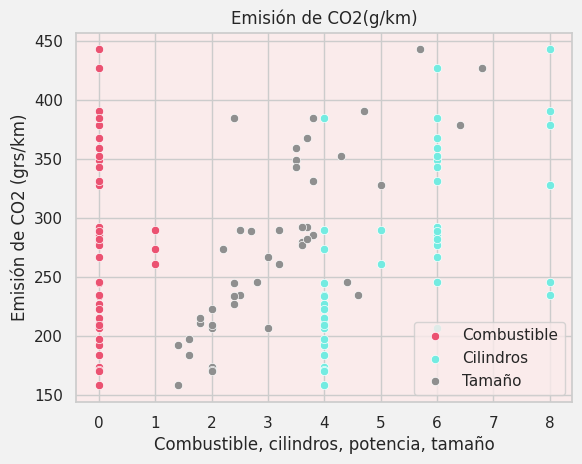

In [36]:
sns.set(style="whitegrid", rc={"axes.facecolor": "#FAEBEB"})

grph = sns.scatterplot(data = emisiones, x = 'Combustible X1', y = 'CO2(g/km) Y', color = '#EB5271', label = 'Combustible')
graph = sns.scatterplot(data = emisiones, x = 'Cilindros X2', y = 'CO2(g/km) Y', color = '#73EBE1', label = 'Cilindros')
#graph = sns.scatterplot(data = emisiones, x = 'Potencia X3', y = 'CO2(g/km) Y', color = '#F0D93A', label = 'Potencia')
graph = sns.scatterplot(data = emisiones, x = 'Tamaño X4', y = 'CO2(g/km) Y', color = '#8F8F8F', label = 'Tamaño')

plt.xlabel("Combustible, cilindros, potencia, tamaño")
plt.ylabel("Emisión de CO2 (grs/km)")
plt.title("Emisión de CO2(g/km)")

plt.legend(loc='lower right')

graph.get_figure().set_facecolor("#f2f2f2")

# CORRELACIONES

## MATRIZ DE CORRELACION

In [37]:
matriz_corr = emisiones.corr(numeric_only=True)
matriz_corr

,Combustible X1,Cilindros X2,Potencia X3,Tamaño X4,CO2(g/km) Y
Combustible X1,1.000000,-0.124362,-0.174448,-0.052480,0.004333
Cilindros X2,-0.124362,1.000000,0.809860,0.862086,0.622664
Potencia X3,-0.174448,0.809860,1.000000,0.770113,0.414944
Tamaño X4,-0.052480,0.862086,0.770113,1.000000,0.785453
CO2(g/km) Y,0.004333,0.622664,0.414944,0.785453,1.000000


CONCLUSION:

La relación lineal entre la emisión de CO2 y el tamaño del motor es fuerte y directa; las relaciones entre CO2 y la cantidad de cilindros y CO2 y la potencia son directas y medianamente fuertes. Por otra parte, la relación entre CO2 y el tipo de combustible es directa pero muy débil.

Cabe señalar que la más fuerte es con Tamaño y la menos fuerte es con tipo de combustible.

Hay multicolinealidad:
Se observa correlación entre las variables independientes Cilindros y Tamaño, entre Cilindros y Potencia y entre Potencia y Tamaño, observándose entre dichas variables un coeficiente de correlación es mayor a 0.7. Se puede afirmar que las variables mencionadas tienden a predecir lo mismo.

Se hará una prueba de hipotesis para decidir cuáles se quedan en el modelo.

## MODELO

In [38]:
features = ['Combustible X1', 'Cilindros X2', 'Potencia X3', 'Tamaño X4']
target = 'CO2(g/km) Y'

X = sm.add_constant(emisiones[features])
y = emisiones[target]

model = sm.OLS(y, X).fit()

coeficientes = model.params

print('Coeficientes:', coeficientes)

Coeficientes: const             128.325407
Combustible X1     -4.708138
Cilindros X2        3.437952
Potencia X3        -0.297186
Tamaño X4          65.146072
dtype: float64


## Y PREDICHA

In [39]:
emisiones['y_predicha'] = 128.32 -4.708*emisiones['Combustible X1'] + 3.437*emisiones['Cilindros X2'] - 0.297*emisiones['Potencia X3'] + round(65.146*emisiones['Tamaño X4'],3)
emisiones

,Combustible X1,Cilindros X2,Potencia X3,Tamaño X4,CO2(g/km) Y,y_predicha
0,1,5,197,3.2,290,290.755
1,1,4,125,2.2,274,243.556
2,1,5,197,3.2,261,290.755
3,0,6,430,3.8,286,268.787
4,0,4,192,2.0,171,215.336
5,0,4,143,2.5,290,262.462
6,0,8,412,5.0,328,359.182
7,0,6,431,3.0,267,216.373
8,0,6,505,6.8,427,441.950
9,0,4,160,2.0,174,224.840


## CORRELACIONES (CONT)

In [40]:
# resultados
tabla = model.summary()
tabla

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CO2(g/km) Y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     25.31
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.03e-10
Time:                        20:12:35   Log-Likelihood:                -239.57
No. Observations:                  47   AIC:                             489.1
Df Residuals:                      42   BIC:                             498.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            128.3254     28.276      4.538      0.000      71.262     185.389
Combustible X1    -4.7081     25.653     -0.184      0.855     -56.479      47.062
Cilindros X2       3.4380      9.883      0.348      0.730     -16.507      23.383
Potencia X3       -0.2972      0.089     -3.330      0.002      -0.477      -0.117
Tamaño X4         65.1461     10.077      6.465      0.000      44.809      85.483
==============================================================================
Omnibus:                        5.430   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.807
Skew:                           0.782   Prob(JB):                       0.0904
Kurtosis:                       3.097   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Rcuadrado** : 0.707

Indica que el 70% de la variación observada en la cantidad de CO2 emitido puede explicarse por el combustible, el número de cilindros, el tamaño del motor y la potencia del vehículo.

EL 30% restante se debe al error aleatorio o a otras variables no incluidas en el modelo.


# **Rcuadrado ajustado**: 0.679

 Cuando se analiza el R cuadrado ajustado en función de la cantidad de variables incluidas en el modelo (4), se observa que arroja un valor de 0.679, lo que indica que el 67.9% de la variacion de la cantidad de CO2 emitido se explica por las variables del modelo.



# **r Pearson**:


## R correlacion de la regresión: 0.84

In [41]:
r_regresion = emisiones['CO2(g/km) Y'].corr(emisiones['y_predicha'])
print(r_regresion)

print('EL coeficiente de correlación arroja un valor alto, sugiriendo que la Y_predicha obtenida con el modelo tiene una relación fuerte y positiva\n con la variable y_observada, para la muestra analizada, siendo indicador de la confiabilidad del modelo desarrollado.')

0.8406812226632006
EL coeficiente de correlación arroja un valor alto, sugiriendo que la Y_predicha obtenida con el modelo tiene una relación fuerte y positiva
 con la variable y_observada, para la muestra analizada, siendo indicador de la confiabilidad del modelo desarrollado.


## R correlacion de la y con las variables predictoras

Como se había señalado a partir del análisis de la matriz de correlación, la variable Tipo de Combustible, tiene una correlación casi nula (r 0.004) con la variable objetivo, CO2.

A continución se obtienen los p values para cada variable, para realizar posteriormente una prueba de hipotésis a fin de determinar si las correlacion halladas en la muestra son significativas desde el punto de vista estadístico, y deben permanecer o no en el modelo.  

In [42]:
# obtenemos los p values de las variables observadas
p_values  = pd.DataFrame()

columns = ['Combustible X1', 'Cilindros X2', 'Potencia X3', 'Tamaño X4', 'CO2(g/km) Y']

for col1 in columns:
    for col2 in columns:
        correlation, p_value = pearsonr(emisiones[col1], emisiones[col2])
        p_values.loc[col1, col2] = format(p_value, '.8f')

print("Valores p:")
print(p_values)

Valores p:
               Combustible X1 Cilindros X2 Potencia X3   Tamaño X4 CO2(g/km) Y
Combustible X1     0.00000000   0.40492241  0.24088679  0.72608331  0.97694002
Cilindros X2       0.40492241   0.00000000  0.00000000  0.00000000  0.00000296
Potencia X3        0.24088679   0.00000000  0.00000000  0.00000000  0.00373035
Tamaño X4          0.72608331   0.00000000  0.00000000  0.00000000  0.00000000
CO2(g/km) Y        0.97694002   0.00000296  0.00373035  0.00000000  0.00000000


### PRUEBA DE HIPOTESIS PARA LOS COEFICIENTES DE CORRELACION R

H0: no hay relacion entre x e y

H1: hay relacion entre x e y

CRITERIO P VALUE

p_value < alfa 0.05 = se rechaza H0

p_value >= alfa 0.05 = se rechaza la h1

CONCLUSION:

Las variables Cilindros, Potencia y Tamaño tienen un p value menor a .5 (*valor establecido para alfa*), evaluadas en relacion a la variable Y, sugiriendo que la correlacion observada en la muestra es significativa a nivel poblacional.

En el caso del Tipo de Combustible, el p value es mayor a .5, sugiriendo que esa variable tiene baja correlación con la emisión de CO2, por lo que debería quitarse del modelo.



Multicolinealidad:

H0: no hay relación entre x1 y x2

H1: hay relación entre x1 y x2


**Se rechaza la H0 para Cilindros y Potencia, Cilindros y Tamaño, Potencia y Tamaño. Se puede afirmar que hay relación entre esas variables, y de incluirse en el modelo de regresión, tenderían a predecir lo mismo, por lo cual será necesario definir cuáles deben permanecer.**

Obtención de los cuadrados y los grados de libertad

In [43]:
n = len(emisiones['CO2(g/km) Y'])
k = 4
media_y = emisiones['CO2(g/km) Y'].mean()
estad_f = 25.31
prob_Fstatistic = format(1.03e-10, '.12f')

gl_regresion = k
gl_error = n-1-k
gl_total = n-1
print("Grados de libertad\n",'de la regresión:',k,'\n','del error:',n-k-1,'\n','totales:',n-1)

ssr = ((emisiones['y_predicha'] - media_y)**2).sum()
sse = ((emisiones['CO2(g/km) Y'] - emisiones['y_predicha'])**2).sum()
sst = ((emisiones['CO2(g/km) Y'] - media_y)**2).sum()
print('Suma de cuadrados\n','de la regresión:',ssr,'\n','del error:',sse,'\n','totales:',sst)

ssr_prom = ssr/k
sse_prom = sse/n-k-1
print('Promedio de los cuadrados\n', 'de la regresión:',ssr_prom,'\n','del error:',sse_prom)

Grados de libertad
 de la regresión: 4 
 del error: 42 
 totales: 46
Suma de cuadrados
 de la regresión: 177483.88585919153 
 del error: 73620.54530599999 
 totales: 251045.87234042556
Promedio de los cuadrados
 de la regresión: 44370.97146479788 
 del error: 1561.394580978723


# VARIABILIDAD

## ERROR TIPICO SYX

In [44]:
# SYX raiz de SSE / n-k-1
syx = np.sqrt(((emisiones['CO2(g/km) Y'] - emisiones['y_predicha'])**2).sum() / (n-k-1))
print("El error estandar de estimacion syx es",syx)
print('La variablidad hallada en el modelo es de +/- 41.86 g/km.')

El error estandar de estimacion syx es 41.86729184379297
La variablidad hallada en el modelo es de +/- 41.86 g/km.


## COEFICIENTE DE VARIABILIDAD

In [45]:
# cv = syx / media Y
cv = np.sqrt((((emisiones['CO2(g/km) Y'] - emisiones['y_predicha'])**2).sum()) / (n-k-1)) / media_y
print('El coeficiente de variación es ', cv)
print('Al ser el coef de variación menor a .5, estaría indicando que el modelo de ajusta bien a los datos y es capaz de realizar predicciones con un alto nivel de precisión.')


El coeficiente de variación es  0.15291907962840146
Al ser el coef de variación menor a .5, estaría indicando que el modelo de ajusta bien a los datos y es capaz de realizar predicciones con un alto nivel de precisión.


# **ANOVA**

In [46]:
anova = pd.DataFrame({'Fuente de variación':['Regresión', 'Error', 'Total'], 'Grados de libertad':[gl_regresion,gl_error,gl_total],'Suma de cuadrados':[ssr,sse,sst], 'Promedio de los cuadrados':[ssr/k,sse/gl_error,None], 'f de Fischer':[25.31, None, None], 'Probabilidad de f':[format(1.03e-10, '.10f'), None, None]})
anova

,Fuente de variación,Grados de libertad,Suma de cuadrados,Promedio de los cuadrados,f de Fischer,Probabilidad de f
0,Regresión,4,177483.885859,44370.971465,25.31,0.0000000001
1,Error,42,73620.545306,1752.870126,NaN,None
2,Total,46,251045.872340,NaN,NaN,None


# PRUEBA DE HIPOTESIS PARA F:

HIPOTESIS

H0: b1,b2,b3 = 0

H1: b1 o b2 o b3 ≠ 0 (alguna b distinta de 0)

alfa = 0.05


Criterio p value:

Si p value < alfa: rechazo H0.

Si p value >= alfa: no rechazo H0


In [81]:
alfa = 0.05

# p value
p_value = f.sf(estad_f, gl_regresion, gl_error)
print('El p value para f es ',format(p_value, '.12f'))

if p_value < alfa:
    print('Como p value es menor a alfa, se rechaza la H0. Con un nivel de confianza del 95% se puede afirmar que al menos una de las pendientes es distinta de 0, por lo tanto, tiene un efecto significativo sobre la variable dependiente.')
else:
    print('Como p value es mayor a alfa, no se rechaza la H0. Con un nivel de confianza del 95% se puede afirmar que ninguna de las pendientes es distinta de 0, por lo que no tendría efecto alguno sobre la variable objetivo')

El p value para f es  0.000000000102
Como p value es menor a alfa, se rechaza la H0. Con un nivel de confianza del 95% se puede afirmar que al menos una de las pendientes es distinta de 0, por lo tanto, tiene un efecto significativo sobre la variable dependiente.


# PRUEBA DE HIPOTESIS PARA LAS PENDIENTES O SIGNIFICANCIA DE LOS COEFICIENTES

En la prueba de hipotesis de la f, encontramos que alguna de las pendientes de las variables independientes incluidas en el modelo es distinta de 0.

Ahora se pasará a analizar cada una, y ver cuáles son las variables que sí tienen impacto sobre la variable Y, y por lo tanto serán las que se queden en el modelo.

También se evalúa el intercepto.

H0: La pendiente es igual a 0.

H1: la pendiente es distinta de 0.

p_value < alfa: Se rechaza H0

p_value >= alfa: No se rechaza H0

In [80]:
alfa = 0.05
p_valuem1 = 0.855266029403 # no rechazo H0, la pendiente es 0
p_valuem2 = 0.729676991831 # no rechazo H0, la pendiente es 0
p_valuem3 = 0.001818395842 # rechazo H0, la pendiente es distinta de 0, se queda en el modelo
p_valuem4 = 0.000000085191 # rechazo H0, la pendiente es distinta de 0, se queda en el modelo
print('Con un nivel de significancia de 0.05, hay evidencia suficiente para asegurar que los coeficientes de Potencia y de Tamaño son distintos a 0, por tanto, permanecen en el modelo, mientras que las variables Combustible y Cilindros son desechadas.')


Con un nivel de significancia de 0.05, hay evidencia suficiente para asegurar que los coeficientes de Potencia y de Tamaño son distintos a 0, por tanto, permanecen en el modelo, mientras que las variables Combustible y Cilindros son desechadas.


# NUEVO MODELO

Con las variables seleccionadas Potencia y Tamaño.

In [49]:
emisiones = emisiones[['Potencia X3', 'Tamaño X4', 'CO2(g/km) Y']]
emisiones.columns = ['Potencia X1', 'Tamaño X2', 'CO2(g/km) Y']
emisiones

,Potencia X1,Tamaño X2,CO2(g/km) Y
0,197,3.2,290
1,125,2.2,274
2,197,3.2,261
3,430,3.8,286
4,192,2.0,171
5,143,2.5,290
6,412,5.0,328
7,431,3.0,267
8,505,6.8,427
9,160,2.0,174


In [50]:
matriz_corr = emisiones.corr(numeric_only=True)
matriz_corr

,Potencia X1,Tamaño X2,CO2(g/km) Y
Potencia X1,1.000000,0.770113,0.414944
Tamaño X2,0.770113,1.000000,0.785453
CO2(g/km) Y,0.414944,0.785453,1.000000


CONCLUSION:

Entre las variables Tamaño y la emisión de CO2 se observa una correlación fuerte y directa, mientras que entre la Potencia y la emisión de CO2 la correlación es moderada y directa.

In [51]:
# obtención del modelo de regresión con la variables seleccionadas

features = ['Potencia X1', 'Tamaño X2']
target = 'CO2(g/km) Y'

X = sm.add_constant(emisiones[features])
y = emisiones[target]

model = sm.OLS(y, X).fit()

coeficientes = model.params

print('Coeficientes:', coeficientes)

Coeficientes: const          135.665309
Potencia X1     -0.280197
Tamaño X2       67.175424
dtype: float64


## Y predicha

In [52]:
emisiones['y_predicha'] = 135.665309 -0.280197*emisiones['Potencia X1'] + 67.175424*emisiones['Tamaño X2']
emisiones

<ipython-input-52-c074c407b8c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emisiones['y_predicha'] = 135.665309 -0.280197*emisiones['Potencia X1'] + 67.175424*emisiones['Tamaño X2']


,Potencia X1,Tamaño X2,CO2(g/km) Y,y_predicha
0,197,3.2,290,295.427857
1,125,2.2,274,248.426617
2,197,3.2,261,295.427857
3,430,3.8,286,270.447210
4,192,2.0,171,216.218333
5,143,2.5,290,263.535698
6,412,5.0,328,356.101265
7,431,3.0,267,216.426674
8,505,6.8,427,450.958707
9,160,2.0,174,225.184637


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CO2(g/km) Y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     52.73
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.07e-12
Time:                        20:13:31   Log-Likelihood:                -239.66
No. Observations:                  47   AIC:                             485.3
Df Residuals:                      44   BIC:                             490.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         135.6653     16.181      8.384      0.000     103.054     168.276
Potencia X1    -0.2802      0.077     -3.640      0.001      -0.435      -0.125
Tamaño X2      67.1754      7.524      8.929      0.000      52.013      82.338
==============================================================================
Omnibus:                        5.565   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.005
Skew:                           0.799   Prob(JB):                       0.0819
Kurtosis:                       3.065   Cond. No.                         789.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Residuos

In [60]:
emisiones['Residuos'] = model.resid
emisiones

<ipython-input-60-b4be2cb45a00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emisiones['Residuos'] = model.resid


,Potencia X1,Tamaño X2,CO2(g/km) Y,y_predicha,Residuos
0,197,3.2,290,295.427857,-5.427953
1,125,2.2,274,248.426617,25.573322
2,197,3.2,261,295.427857,-34.427953
3,430,3.8,286,270.447210,15.552582
4,192,2.0,171,216.218333,-45.218426
5,143,2.5,290,263.535698,26.464232
6,412,5.0,328,356.101265,-28.101465
7,431,3.0,267,216.426674,50.573118
8,505,6.8,427,450.958707,-23.958952
9,160,2.0,174,225.184637,-51.184715


## Residuos estandarizados

In [82]:
n = len(emisiones['Potencia X1'])

std_residuos = emisiones['Residuos'].std()

emisiones['Residuos estandar'] = emisiones['Residuos']/std_residuos
emisiones

,Potencia X1,Tamaño X2,CO2(g/km) Y,y_predicha,Residuos,Percentil,Residuos estandar
0,197,3.2,290,295.427857,-5.427953,2.13,-0.135415
1,125,2.2,274,248.426617,25.573322,4.26,0.637996
2,197,3.2,261,295.427857,-34.427953,6.38,-0.858899
3,430,3.8,286,270.447210,15.552582,8.51,0.388002
4,192,2.0,171,216.218333,-45.218426,10.64,-1.128097
5,143,2.5,290,263.535698,26.464232,12.77,0.660223
6,412,5.0,328,356.101265,-28.101465,14.89,-0.701068
7,431,3.0,267,216.426674,50.573118,17.02,1.261685
8,505,6.8,427,450.958707,-23.958952,19.15,-0.597722
9,160,2.0,174,225.184637,-51.184715,21.28,-1.276943


# ANALISIS DE RESIDUALES

Por último, se pasa a corroborar el cumplimiento de los supuestos de la regresión.

## **1er supuesto**

El error es una variable con media igual a 0

In [79]:
media_residuos = emisiones['Residuos'].mean()
print('Se cumple el primer supuesto, promedio del error = ', media_residuos)

Se cumple el primer supuesto, promedio del error =  1.5359817436856633e-13


### **2do supuesto**

La varianza del error es igual para todas las x. Se verifica el cumplimiento de la homocedasticidad.

CONCLUSION: Como no se observa un patrón de < o de U, entonces se cumple el supuesto de varianza constante, es decir, existe homocesdaticidad, podemos decir que la varianza del error condicional a las variables explicativas es constante a lo largo de las observaciones.



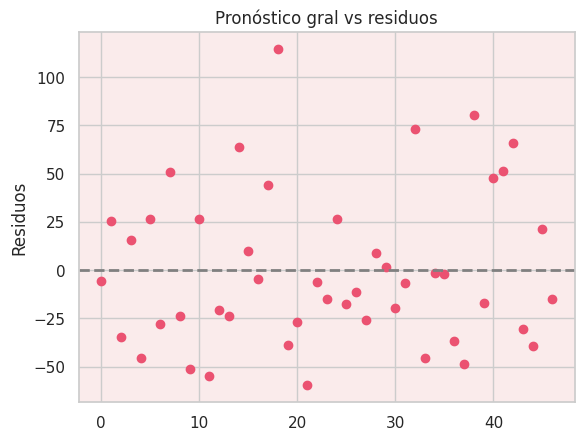

In [84]:
# gráfico de la dispersión de los residuos
sns.set(style="whitegrid", rc={"axes.facecolor": "#FAEBEB"})
plt.scatter(np.arange(len(emisiones['Residuos'])), emisiones['Residuos'], color = '#EB5271')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=2)

plt.ylabel("Residuos")
plt.title("Pronóstico gral vs residuos")

print('CONCLUSION: Como no se observa un patrón de < o de U, entonces se cumple el supuesto de varianza constante, es decir, existe homocesdaticidad, podemos decir que la varianza del error condicional a las variables explicativas es constante a lo largo de las observaciones.\n')


### **3er supuesto**

El error es una variable aleatoria con distribucion normal

CONCLUSION: Como la gráfica de probabilidad normal se acerca a una línea recta, entonces los residuos provienen de una distribución casi simétrica, con esto se cumple el supuesto de normalidad.



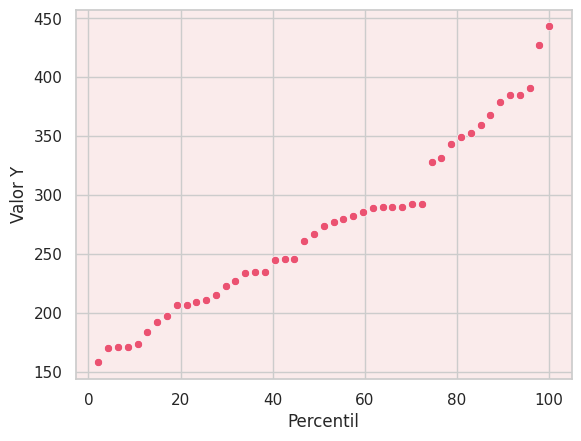

In [83]:
# obtención de los percentiles para verificar si la dispersión tiene forma lineal

tabla = {'Valor Y':[], 'Percentil':[]}
tabla = pd.DataFrame(tabla)
tabla['Valor Y'] = emisiones['CO2(g/km) Y']
tabla = tabla.sort_values(by = 'Valor Y')
percentiles = [round((valor / len(emisiones)) * 100, 2) for valor in range(1, len(emisiones) + 1)]
tabla['Percentil'] = percentiles

sns.set(style="whitegrid", rc={"axes.facecolor": "#FAEBEB"})
grph = sns.scatterplot(data = tabla, x = 'Percentil', y = 'Valor Y', color = '#EB5271')

print('CONCLUSION: Como la gráfica de probabilidad normal se acerca a una línea recta, entonces los residuos provienen de una distribución casi simétrica, con esto se cumple el supuesto de normalidad.\n')


### **4to supuesto**

INDEPENDENCIA

Criterio Durbin y Watson

Si dc < dl = se rechaza H0

Si dc > du = no se rechaza H0

Si dc > dl and dc < du = sin resolucion

### PH para correlacion positiva

H0: r = 0

H1: r > 0

In [75]:
#n = len(emisiones['CO2(g/km) Y'])
n = 45
k = 2
alfa = 0.05
dc = 2.233

dl = 1.43
du = 1.615

if dc < dl:
  print('se rechaza H0, entonces r es mayor a 0. Hay autocorrelacion positiva')
elif dc > du:
  print('No se rechaza H0, r es igual a 0. No hay autocorrelacion positiva ')
else:
  print('Sin resolucion')

No se rechaza H0, r es igual a 0. No hay autocorrelacion positiva 


PH PARA AUTOCORRELACION NEGATIVA

H0: r = 0

H1: r < 0

In [76]:
dc_negat = 4 - dc
if dc_negat < dl:
  print('se rechaza H0, entonces r es menor a 0. Hay autocorrelacion negativa')
elif dc_negat > du:
  print('No se rechaza H0, r es igual a 0. No hay autocorrelacion negativa ')
else:
  print('Sin resolucion')

No se rechaza H0, r es igual a 0. No hay autocorrelacion negativa 


### CONCLUSION

Como no existe autocorrelación positiva ni negativa, entonces se cumple el supuesto de independencia de los errores.